Processing:   0%|          | 0/15 [00:00<?, ?it/s]

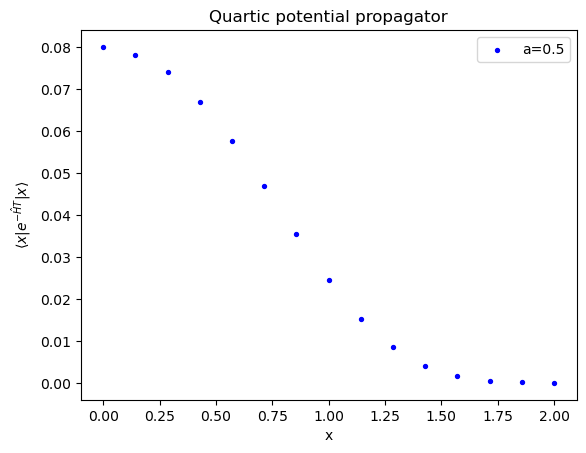

In [1]:
#Evaluate the propagator for one-dimensional harmonic oscillator and quartic potential with vegas integration and comparison
#with the analytic result - Quartic case
import vegas 
from tqdm.notebook import tqdm
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

a=1/2
N=8
x_min=-5
x_max=5
T=4
x=np.linspace(0, 2,15) #initial and final values to sweep 

#Potential function with the harmonic and anharmonic case 
def V(x):
    return x**4/2

#Integrand function
def I(x):
    S=0
    #constructing the action
    for i in range(N-1): 
        if i == 0:
            S += (1/(2*a))*(x[i]-x_i)**2 + (a/2)*(V(x_i) + V(x[i])) #this is the action from x_i (t0) to x[0] (t1)
        elif i == N-2:
            S += (1/(2*a))*((x_f-x[i])**2 + (x[i]-x[i-1])**2) + (a/2)*(V(x[i])+V(x[i-1])) + (a/2)*(V(x_f)+V(x[i])) #this is the action from x[5] (t6) to 
                                                                                                                #x[6] (t7) and x[6] to x_f (t8)
        else:
            S += (1/(2*a))*(x[i]-x[i-1])**2 + (a/2)*(V(x[i-1])+V(x[i])) #this is the action from x[i-1] to x[i] in time interval different from t0-t1 
                                                                        #(first one), t6-t7 (second last) and t7-t8 (last one)
    return ((1/(2*np.pi*a))**(N/2))*np.exp(-S) #this is the integrand function

if __name__ == "__main__":
    f_numeric=np.empty((len(x))) #empty array which will be filled with the results of each integration with different initial and final values of x
    
    for idx, value in enumerate(tqdm(x, desc="Processing")): #for each fixed initial/final value we integrate
        x_i=value 
        x_f=x_i
        integ = vegas.Integrator((N-1)*[[x_min, x_max]]) #Specify integration details, including integration intervals for each of the independent 
                                                        #variables. I am integrating N-1 times since initial and final value are fixed
        result = integ(I, nitn=10, neval=100000) #Integration results of the integrand function I
        f_numeric[idx]=result.mean #Filling the empty array
        
        #print("Iterazione numero:", idx)
        #print("Condizioni al contorno:", value)
        #print("Valore dell'integrale:", result.mean)
        #print("Deviazione standard:", result.sdev)
        #print("Valore esatto:", exact(x_i))
        #print("")

    xe=np.linspace(0, 2,100) 
    #Plotting the numeric results of the integration
    plt.scatter(x,f_numeric ,label='a=0.5', color='blue', marker='o', s=8)
    plt.xlabel('x')
    plt.ylabel(r'$\langle x | e^{-\hat{H}T} | x \rangle$')
    plt.legend()
    plt.title('Quartic potential propagator')
    plt.savefig('Vegas_Quart.png')